In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [10]:
# Ruta del dataset
ruta_dataset = "../../Limpieza/data/df_unificado_limpio_imputado.csv"
df = pd.read_csv(ruta_dataset)

In [11]:
print("Estructura del dataset:")
print(df.info())

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AÑO                           917885 non-null  int64  
 1   TRIMESTRE                     917885 non-null  float64
 2   PROVEEDOR                     917885 non-null  object 
 3   CÓDIGO DANE                   917885 non-null  float64
 4   DEPARTAMENTO                  917885 non-null  object 
 5   CÓDIGO DANE.1                 917885 non-null  float64
 6   MUNICIPIO                     917885 non-null  object 
 7   SEGMENTO                      917885 non-null  object 
 8   TECNOLOGÍA                    917885 non-null  object 
 9   VELOCIDAD BAJADA              917885 non-null  float64
 10  VELOCIDAD SUBIDA              917885 non-null  float64
 11  No. ACCESOS FIJOS A INTERNET  917885 non-null  int64  
 12  Latitud             

In [12]:
X = df[['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA', 'Latitud', 'Longitud']]
y = df['No. ACCESOS FIJOS A INTERNET']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(f"Forma de X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}, y_test: {y_test.shape}")

Forma de X_train: (734308, 6), y_train: (734308,)
Forma de X_test: (183577, 6), y_test: (183577,)


In [15]:
modelo = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=6,
                          random_state=42)
modelo.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [16]:
y_pred = modelo.predict(X_test)

In [17]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")


Error cuadrático medio (MSE): 303949.1633870539
Coeficiente de determinación (R²): 0.21720588207244873


In [20]:
importancia = modelo.feature_importances_
variables = X.columns

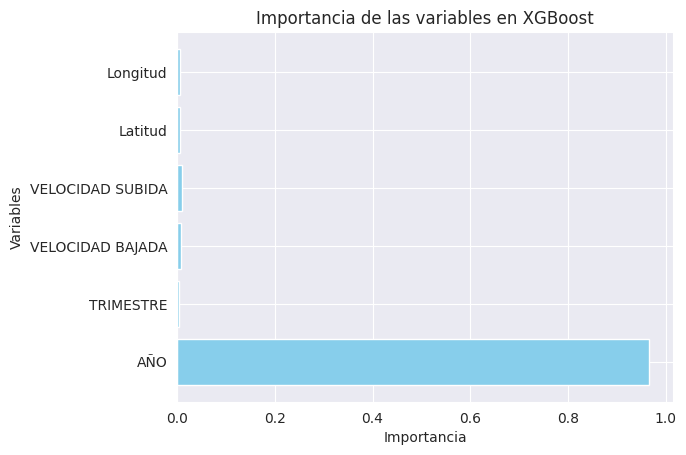

In [21]:
plt.barh(variables, importancia, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en XGBoost')
plt.show()

# Conclusiones del modelo XGBoost
1. **Desempeño del modelo:**

- El Error Cuadrático Medio (MSE) es de 303,949, lo que indica que, en promedio, las predicciones del modelo tienen un margen de error elevado en términos absolutos.
- El Coeficiente de Determinación (R²) es de 0.217, lo que sugiere que el modelo solo explica un 21.7% de la varianza en los datos. Esto es similar al desempeño observado con el modelo de regresión lineal y Random Forest, lo que podría indicar que hay limitaciones en las características del dataset.

2. **Importancia de las variables:**

- La variable **AÑO** tiene, con diferencia, la mayor importancia en las predicciones del modelo, lo que refuerza que las tendencias temporales son el factor más relevante para el acceso a internet en este dataset.
Las demás variables (como TRIMESTRE, VELOCIDAD BAJADA, y VELOCIDAD SUBIDA) tienen una importancia prácticamente nula. Esto sugiere que no están aportando información significativa al modelo tal como están representadas.
Posibles problemas:

- El bajo valor de R² sugiere que el modelo tiene dificultades para capturar patrones complejos o no lineales en los datos.
- La poca importancia de variables como VELOCIDAD BAJADA y SUBIDA puede ser un indicativo de que estas no están correctamente representadas en el modelo o que no tienen suficiente variabilidad en los datos.
Comparación con modelos anteriores:

El desempeño del modelo es similar al de Random Forest y Regresión Lineal, lo que indica que probablemente el problema no esté tanto en la elección del modelo, sino en la calidad o representación de las características.

3. **Posibles problemas**
Bajo R²:
- El bajo valor de R² sugiere que el modelo no está capturando patrones complejos en los datos, posiblemente debido a la representación limitada de las características.
- Importancia de las variables:
    - La falta de relevancia de variables como VELOCIDAD BAJADA y VELOCIDAD SUBIDA puede deberse a poca variabilidad en los datos o a que no se han procesado de manera adecuada para su inclusión en el modelo.

4. **Comparación con otros modelos**
El desempeño del modelo XGBoost es similar al de Random Forest y Regresión Lineal, lo que podría indicar que el problema radica más en la calidad o en la representación de las características que en el modelo en sí.
